#Sentiment Analysis with Python


In [2]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
pos=data[data['label']==1]
neg=data[data['label']==0]
print("Positive text \n",pos.head())
print("\nNegative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1

Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Text(0.5, 1.0, 'Positive vs Negative')

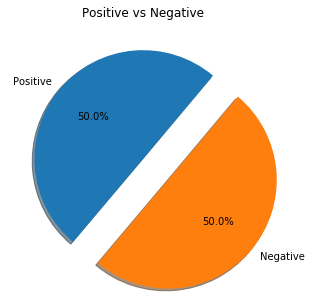

In [4]:

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
temp=[pos['label'].count(),neg['label'].count()]
plt.pie(temp,labels=["Positive","Negative"],autopct ='%2.1f%%',shadow = True,startangle = 50,explode=(0, 0.3))
plt.title('Positive vs Negative')

In [5]:
import re
def preprocess(text):
        text=re.sub('<[^>]*>','',text)
        emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
        text=re.sub('[\W]+',' ',text.lower()) +' '.join(emoji).replace('-','')
        return text   

In [6]:
 data['text']=data['text'].apply(preprocess)

In [7]:
 data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [8]:
def tokenizer(text):
        return text.split()


In [9]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
positive_data = data[ data['label'] == 1]
positive_data = positive_data['text']
negative_data = data[data['label'] == 0]
negative_data= negative_data['text']

In [12]:
def plot_wordcloud(data, color = 'white'):
    words = ' '.join(data)
    clean_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stop,background_color=color,width=2500,height=2000).generate(clean_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


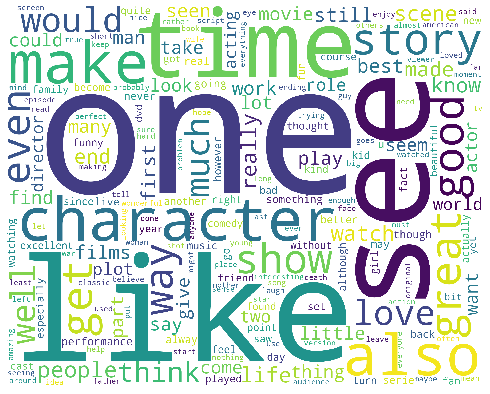

In [13]:
print("Positive words")
plot_wordcloud(positive_data,'white')

Negative words


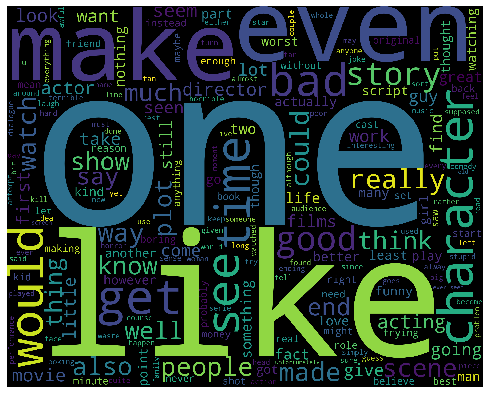

In [14]:
print("Negative words")
plot_wordcloud(negative_data,'black')

In [15]:
 from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(strip_accents=None,preprocessor=None,lowercase=False,use_idf=True,norm='l2',tokenizer=tokenizer_porter,smooth_idf=True)
y=data.label.values
 x=tfid.fit_transform(data.text)

In [16]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [17]:
 from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   38.1s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   38.6s finished


In [18]:
 from sklearn import metrics
 print("Accuracy of the model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model: 0.89045
